In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
iris = pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.shape

(150, 6)

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
iris.drop('Id', axis = 1, inplace = True)

In [6]:
iris.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

/home/nikhil/snap/jupyter/common/lib/python3.7/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


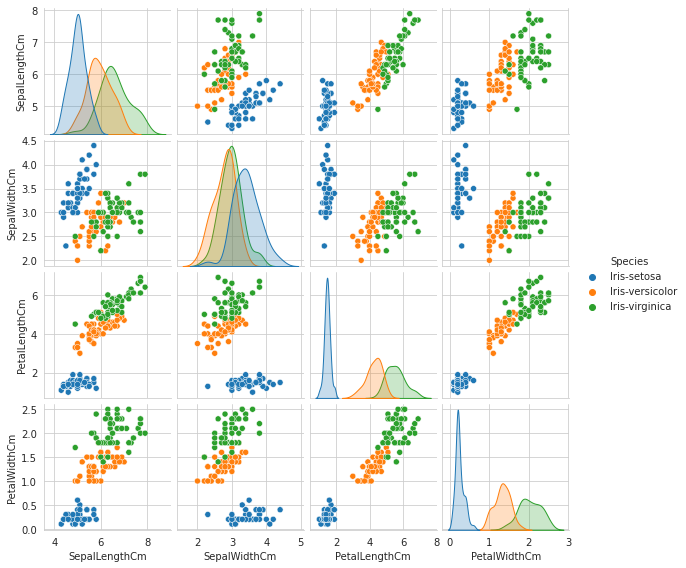

In [8]:
plt.close()
sns.pairplot(iris, hue = 'Species', size = 2, diag_kind = 'kde')
plt.show()

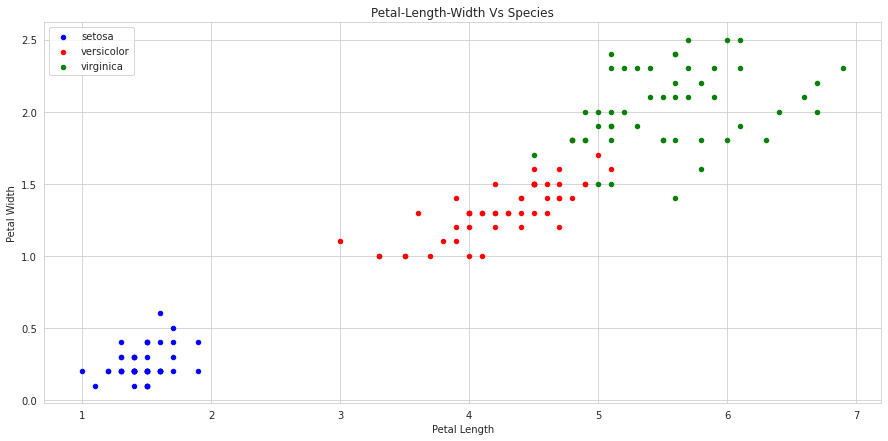

In [9]:
pet_len_wid = iris[iris.Species == 'Iris-setosa'].plot(kind = 'scatter', x = 'PetalLengthCm', y = 'PetalWidthCm'
,color = 'blue', label = 'setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind = 'scatter', x = 'PetalLengthCm', y = 'PetalWidthCm', color = 'red'
,label = 'versicolor', ax = pet_len_wid)
iris[iris.Species == 'Iris-virginica'].plot(kind = 'scatter', x = 'PetalLengthCm', y = 'PetalWidthCm', color = 'green'
,label = 'virginica', ax = pet_len_wid)
pet_len_wid.set_xlabel('Petal Length')
pet_len_wid.set_ylabel('Petal Width')
pet_len_wid.set_title('Petal-Length-Width Vs Species')
pet_len_wid = plt.gcf()
pet_len_wid.set_size_inches(15, 7)
plt.show()

In [13]:
iris.loc[iris["Species"]=="Iris-setosa","Species"]=0
iris.loc[iris["Species"]=="Iris-versicolor","Species"]=1
iris.loc[iris["Species"]=="Iris-virginica","Species"]=2

iris=iris.iloc[np.random.permutation(len(iris))]

print(iris.head())

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm Species
119            6.0           2.2            5.0           1.5       2
144            6.7           3.3            5.7           2.5       2
21             5.1           3.7            1.5           0.4       0
55             5.7           2.8            4.5           1.3       1
26             5.0           3.4            1.6           0.4       0


In [17]:
X=iris.iloc[:,1:5].values
y=iris.iloc[:,-1].values

In [20]:
from sklearn.preprocessing import normalize
X_normalized=normalize(X,axis=0)

/home/nikhil/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.8)

In [30]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Activation,Dropout 
from tensorflow.keras.layers import BatchNormalization 
from tensorflow.keras.utils import to_categorical

In [31]:
y_train=to_categorical(y_train,num_classes=3)
y_test=to_categorical(y_test,num_classes=3)

In [157]:
model=Sequential()
model.add(Dense(800,input_dim=4,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [158]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 800)               4000      
_________________________________________________________________
dense_57 (Dense)             (None, 500)               400500    
_________________________________________________________________
dense_58 (Dense)             (None, 300)               150300    
_________________________________________________________________
dropout_14 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_59 (Dense)             (None, 3)                 903       
Total params: 555,703
Trainable params: 555,703
Non-trainable params: 0
_________________________________________________________________


In [159]:
model_data = model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=15,epochs=20,verbose=1)

Epoch 1/20
2/2 [==============================] - 1s 432ms/step - loss: 1.0880 - accuracy: 0.5333 - val_loss: 0.9189 - val_accuracy: 0.6583
Epoch 2/20
2/2 [==============================] - 0s 89ms/step - loss: 0.8815 - accuracy: 0.7111 - val_loss: 0.7824 - val_accuracy: 0.6583
Epoch 3/20
2/2 [==============================] - 0s 81ms/step - loss: 0.7960 - accuracy: 0.6444 - val_loss: 0.6616 - val_accuracy: 0.7000
Epoch 4/20
2/2 [==============================] - 0s 87ms/step - loss: 0.6415 - accuracy: 0.8000 - val_loss: 0.5459 - val_accuracy: 0.8833
Epoch 5/20
2/2 [==============================] - 0s 89ms/step - loss: 0.4795 - accuracy: 0.9556 - val_loss: 0.4427 - val_accuracy: 0.9000
Epoch 6/20
2/2 [==============================] - 0s 84ms/step - loss: 0.4074 - accuracy: 0.9111 - val_loss: 0.3546 - val_accuracy: 0.9750
Epoch 7/20
2/2 [==============================] - 0s 82ms/step - loss: 0.2616 - accuracy: 0.9778 - val_loss: 0.2814 - val_accuracy: 1.0000
Epoch 8/20
2/2 [==========

In [164]:
from sklearn.metrics import f1_score
f1_score(y_label, predict_label, average='macro')

1.0

In [175]:
train_loss, train_acc = model.evaluate(X_train,y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test,y_test, verbose=0)

In [176]:
train_acc

1.0

In [177]:
test_acc

1.0

In [178]:
train_loss

0.003978373017162085

In [179]:
test_loss

0.009745294228196144

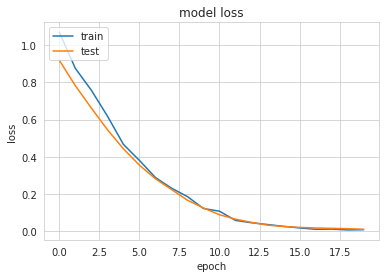

In [165]:
# summarize history for loss
plt.plot(model_data.history['loss'])
plt.plot(model_data.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()